In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_excel("../data/titanic3.xls")

In [10]:
# change names
df = df.rename(columns={'pclass': 'Passenger Class', 'survived': 'Survived', 'age': 'Age', 'sibsp': 'Siblings/spouses aboard', 'parch': 'Parents/children aboard', 'fare': 'Passenger fare', 'embarked': 'Port of Embarkation', 'home.dest': 'Home/Destination'})
# create binary columns for sex and alone
df['sex'] = df['sex'].apply(lambda x: 0 if str(x) == 'male' else 1)
df['alone'] = df.apply(lambda row: 1 if row['Parents/children aboard'] == 0 and row['Siblings/spouses aboard'] == 0 else 0, axis=1)
# fill null values for age and fare
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['Passenger fare'].fillna(value=df['Passenger fare'].mean(), inplace=True)
# drop unused columns
df.drop(['cabin', 'boat', 'body', 'ticket', 'name', 'Port of Embarkation', 'Home/Destination'], axis=1, inplace=True)

In [11]:
#!pip install pycaret
#the session id just makes a scene. It is a seed so you can reproduce it.

import pandas as pd
from pycaret.classification import *

s = setup(df, target = 'Survived', session_id = 123)

best = compare_models()

print(best)

evaluate_model(best)

predict_model(best)

predictions = predict_model(best, data=df)
predictions.head()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1309, 8)"
4,Transformed data shape,"(1309, 8)"
5,Transformed train set shape,"(916, 8)"
6,Transformed test set shape,"(393, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8078,0.8610,0.6571,0.8070,0.7217,0.5778,0.5870,0.0290
lightgbm,Light Gradient Boosting Machine,0.7904,0.8514,0.6971,0.7387,0.7148,0.5499,0.5525,0.0640
lr,Logistic Regression,0.7882,0.8369,0.6771,0.7542,0.7095,0.5440,0.5496,1.7500
lda,Linear Discriminant Analysis,0.7882,0.8354,0.6771,0.7496,0.7091,0.5435,0.5474,0.0060
qda,Quadratic Discriminant Analysis,0.7872,0.8321,0.6943,0.7409,0.7140,0.5450,0.5484,0.0060
ridge,Ridge Classifier,0.7871,0.0000,0.6743,0.7488,0.7072,0.5409,0.5448,0.0060
rf,Random Forest Classifier,0.7861,0.8378,0.7000,0.7304,0.7128,0.5428,0.5450,0.0550
ada,Ada Boost Classifier,0.7827,0.8434,0.7000,0.7256,0.7097,0.5367,0.5396,0.0230
nb,Naive Bayes,0.7773,0.8173,0.7171,0.7113,0.7112,0.5304,0.5335,0.0060
et,Extra Trees Classifier,0.7675,0.8125,0.6771,0.7071,0.6874,0.5032,0.5075,0.0470


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7990,0.8390,0.6667,0.7752,0.7168,0.5624,0.5662


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8556,0.9094,0.7340,0.8676,0.7952,0.6849,0.6906


,Passenger Class,sex,Age,Siblings/spouses aboard,Parents/children aboard,Passenger fare,alone,Survived,prediction_label,prediction_score
0,1,1,29.0000,0,0,211.337494,1,1,1,0.9601
1,1,0,0.9167,1,2,151.550003,0,1,1,0.8784
2,1,1,2.0000,1,2,151.550003,0,0,1,0.5196
3,1,0,30.0000,1,2,151.550003,0,0,0,0.8493
4,1,1,25.0000,1,2,151.550003,0,0,1,0.9598


<font color='yellow'> Volgens Pycaret is sex het meest belangrijke gevolgd door passenger fare, passenger class en age. 
scores zitten tussen 0.8 en 0.9 met 1 voospelling van 0.5196.
confusion matrix is 214, 29, 50, 100</font>

In [12]:
df_carrot2 = df.copy()

selected_columns = ['sex', 'Age', 'Passenger Class', 'Siblings/spouses aboard', 'Survived']

df_carrot2 = df_carrot2[selected_columns]



In [13]:
s = setup(df_carrot2, target = 'Survived', session_id = 123)

best = compare_models()

print(best)

evaluate_model(best)

predict_model(best)

predictions = predict_model(best, data=df)
predictions.head()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1309, 5)"
4,Transformed data shape,"(1309, 5)"
5,Transformed train set shape,"(916, 5)"
6,Transformed test set shape,"(393, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8090,0.8524,0.6743,0.7979,0.7277,0.5827,0.5902,0.0350
lightgbm,Light Gradient Boosting Machine,0.7937,0.8339,0.6600,0.7714,0.7070,0.5501,0.5574,0.0740
qda,Quadratic Discriminant Analysis,0.7914,0.8381,0.6857,0.7525,0.7148,0.5513,0.5553,0.0060
lda,Linear Discriminant Analysis,0.7903,0.8330,0.6743,0.7546,0.7101,0.5470,0.5509,0.0080
ridge,Ridge Classifier,0.7892,0.0000,0.6714,0.7539,0.7082,0.5444,0.5484,0.0060
lr,Logistic Regression,0.7838,0.8335,0.6686,0.7445,0.7016,0.5333,0.5377,0.0110
dt,Decision Tree Classifier,0.7763,0.7767,0.6457,0.7372,0.6857,0.5139,0.5188,0.0070
nb,Naive Bayes,0.7696,0.8198,0.6629,0.7212,0.6868,0.5057,0.5102,0.0070
ada,Ada Boost Classifier,0.7686,0.8332,0.7057,0.6957,0.6980,0.5109,0.5137,0.0260
rf,Random Forest Classifier,0.7676,0.8171,0.6629,0.7105,0.6823,0.5002,0.5039,0.0540


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7863,0.8355,0.6533,0.7538,0.7000,0.5353,0.5386


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8289,0.8849,0.6980,0.8270,0.7570,0.6264,0.6318


,Passenger Class,sex,Age,Siblings/spouses aboard,Parents/children aboard,Passenger fare,alone,Survived,prediction_label,prediction_score
0,1,1,29.0000,0,0,211.337494,1,1,1,0.9657
1,1,0,0.9167,1,2,151.550003,0,1,1,0.9833
2,1,1,2.0000,1,2,151.550003,0,0,0,0.7900
3,1,0,30.0000,1,2,151.550003,0,0,0,0.6760
4,1,1,25.0000,1,2,151.550003,0,0,1,0.9715


<font color= 'yellow'>Bij deze pycaret heb ik kolommen sex, passenger class, age en siblings/spouses aboard geselecteerd.
de prediction score zit nu tussen 6 en 9.
de confusion matrix geeft nu 211, 32, 52, 98 </font>

In [14]:
selected_columns3 = ['sex', 'Age', 'Passenger Class', 'Parents/children aboard', 'Survived']

s = setup(df[selected_columns3], target = 'Survived', session_id = 123)

best = compare_models()

print(best)

evaluate_model(best)

predict_model(best)

predictions = predict_model(best, data=df)
predictions.head()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1309, 5)"
4,Transformed data shape,"(1309, 5)"
5,Transformed train set shape,"(916, 5)"
6,Transformed test set shape,"(393, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7948,0.8482,0.6314,0.7927,0.7004,0.5478,0.5578,0.0330
qda,Quadratic Discriminant Analysis,0.7937,0.8299,0.6686,0.7659,0.7127,0.5529,0.5571,0.0090
lr,Logistic Regression,0.7904,0.8289,0.6771,0.7543,0.7112,0.5478,0.5519,0.0100
ridge,Ridge Classifier,0.7893,0.0000,0.6743,0.7541,0.7094,0.5452,0.5496,0.0070
lda,Linear Discriminant Analysis,0.7893,0.8283,0.6743,0.7541,0.7094,0.5452,0.5496,0.0090
nb,Naive Bayes,0.7838,0.8253,0.6714,0.7459,0.7033,0.5345,0.5393,0.0080
ada,Ada Boost Classifier,0.7828,0.8355,0.7143,0.7196,0.7136,0.5392,0.5425,0.0300
et,Extra Trees Classifier,0.7708,0.7906,0.6314,0.7375,0.6756,0.5008,0.5082,0.0650
lightgbm,Light Gradient Boosting Machine,0.7707,0.8314,0.6171,0.7461,0.6713,0.4983,0.5067,0.0850
dt,Decision Tree Classifier,0.7697,0.7739,0.6229,0.7354,0.6717,0.4969,0.5031,0.0090


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7735,0.8344,0.5933,0.7607,0.6667,0.4991,0.5080


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8189,0.8784,0.6540,0.8363,0.7340,0.5999,0.6103


,Passenger Class,sex,Age,Siblings/spouses aboard,Parents/children aboard,Passenger fare,alone,Survived,prediction_label,prediction_score
0,1,1,29.0000,0,0,211.337494,1,1,1,0.9544
1,1,0,0.9167,1,2,151.550003,0,1,1,0.9861
2,1,1,2.0000,1,2,151.550003,0,0,0,0.7087
3,1,0,30.0000,1,2,151.550003,0,0,0,0.7280
4,1,1,25.0000,1,2,151.550003,0,0,1,0.9750


In [15]:
selected_columns4 = ['sex', 'Age', 'Passenger Class', 'Passenger fare', 'Survived']


s = setup(df[selected_columns4], target = 'Survived', session_id = 123)

best = compare_models()

print(best)

evaluate_model(best)

predict_model(best)

predictions = predict_model(best, data=df)
predictions.head()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1309, 5)"
4,Transformed data shape,"(1309, 5)"
5,Transformed train set shape,"(916, 5)"
6,Transformed test set shape,"(393, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8046,0.8637,0.6543,0.7996,0.7178,0.5710,0.5791,0.0500
lightgbm,Light Gradient Boosting Machine,0.7991,0.8575,0.6943,0.7622,0.7240,0.5671,0.5710,0.0730
ada,Ada Boost Classifier,0.7903,0.8400,0.6943,0.7448,0.7162,0.5506,0.5538,0.0440
lr,Logistic Regression,0.7838,0.8280,0.6771,0.7414,0.7051,0.5354,0.5392,0.0120
lda,Linear Discriminant Analysis,0.7805,0.8279,0.6743,0.7349,0.7011,0.5285,0.5317,0.0090
rf,Random Forest Classifier,0.7795,0.8400,0.6857,0.7230,0.7018,0.5275,0.5298,0.1030
et,Extra Trees Classifier,0.7795,0.8144,0.6857,0.7245,0.7020,0.5276,0.5305,0.0720
ridge,Ridge Classifier,0.7794,0.0000,0.6714,0.7340,0.6991,0.5259,0.5291,0.0100
dt,Decision Tree Classifier,0.7697,0.7614,0.6914,0.7009,0.6954,0.5104,0.5111,0.0100
nb,Naive Bayes,0.7631,0.8057,0.6971,0.6928,0.6923,0.5002,0.5028,0.0090


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7888,0.8408,0.6467,0.7638,0.7004,0.5390,0.5435


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8495,0.9081,0.7320,0.8531,0.7879,0.6724,0.6771


,Passenger Class,sex,Age,Siblings/spouses aboard,Parents/children aboard,Passenger fare,alone,Survived,prediction_label,prediction_score
0,1,1,29.0000,0,0,211.337494,1,1,1,0.9552
1,1,0,0.9167,1,2,151.550003,0,1,1,0.8607
2,1,1,2.0000,1,2,151.550003,0,0,0,0.5865
3,1,0,30.0000,1,2,151.550003,0,0,0,0.8505
4,1,1,25.0000,1,2,151.550003,0,0,1,0.9557


In [16]:
selected_columns4 = ['sex', 'Age', 'Passenger Class', 'Passenger fare', 'Survived']
df_edited = df[df['Passenger fare'] <= 200]

s = setup(df_edited[selected_columns4], target = 'Survived', session_id = 123)

best = compare_models()

print(best)

evaluate_model(best)

predict_model(best)

predictions = predict_model(best, data=df)
predictions.head()

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1271, 5)"
4,Transformed data shape,"(1271, 5)"
5,Transformed train set shape,"(889, 5)"
6,Transformed test set shape,"(382, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7997,0.8362,0.6296,0.7943,0.7000,0.5531,0.5633,0.0360
lr,Logistic Regression,0.7828,0.8236,0.6775,0.7286,0.6985,0.5296,0.5339,0.0100
rf,Random Forest Classifier,0.7817,0.8280,0.6566,0.7350,0.6921,0.5240,0.5273,0.0760
ridge,Ridge Classifier,0.7738,0.0000,0.6565,0.7174,0.6826,0.5079,0.5117,0.0070
lda,Linear Discriminant Analysis,0.7738,0.8223,0.6565,0.7174,0.6826,0.5079,0.5117,0.0120
et,Extra Trees Classifier,0.7727,0.8027,0.6415,0.7190,0.6763,0.5026,0.5057,0.0640
qda,Quadratic Discriminant Analysis,0.7671,0.8155,0.6988,0.6870,0.6909,0.5043,0.5063,0.0080
ada,Ada Boost Classifier,0.7648,0.8108,0.6867,0.6867,0.6842,0.4973,0.4995,0.0340
lightgbm,Light Gradient Boosting Machine,0.7626,0.8256,0.6150,0.7112,0.6576,0.4781,0.4823,0.0680
dt,Decision Tree Classifier,0.7468,0.7382,0.6238,0.6752,0.6463,0.4503,0.4528,0.0080


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8010,0.8614,0.6901,0.7538,0.7206,0.5666,0.5679


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8564,0.9105,0.7480,0.8578,0.7991,0.6882,0.6921


,Passenger Class,sex,Age,Siblings/spouses aboard,Parents/children aboard,Passenger fare,alone,Survived,prediction_label,prediction_score
0,1,1,29.0000,0,0,211.337494,1,1,1,0.9588
1,1,0,0.9167,1,2,151.550003,0,1,1,0.9612
2,1,1,2.0000,1,2,151.550003,0,0,0,0.6874
3,1,0,30.0000,1,2,151.550003,0,0,0,0.8967
4,1,1,25.0000,1,2,151.550003,0,0,1,0.9546


<font color='yellow'>Bij deze pycaret heb ik kolommen sex, passenger class, age en passenger fare geselecteerd.
de prediction score zit nu tussen 8 en 9 met 1 voorspelling van 5.
de confusion matrix geeft nu 213, 30, 53, 97</font>

<font color='red'>Gradient boost classifier</font>


,Description,Value
0,Session id,1183
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(1309, 8)"
4,Transformed data shape,"(1309, 10)"
5,Transformed train set shape,"(916, 10)"
6,Transformed test set shape,"(393, 10)"
7,Ordinal features,1
8,Numeric features,5
9,Categorical features,2


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8261,0.8591,0.6857,0.8276,0.7500,0.6185,0.6249
1,0.8043,0.8378,0.6857,0.7742,0.7273,0.5756,0.5782
2,0.8696,0.9228,0.6857,0.9600,0.8000,0.7072,0.7292
3,0.7826,0.8471,0.6857,0.7273,0.7059,0.5337,0.5343
4,0.8043,0.9331,0.6000,0.8400,0.7000,0.5607,0.5782
5,0.8152,0.8534,0.8000,0.7368,0.7671,0.6144,0.6158
6,0.8352,0.8566,0.7143,0.8333,0.7692,0.6422,0.6468
7,0.7473,0.7870,0.6571,0.6765,0.6667,0.4632,0.4633
8,0.8022,0.8531,0.6000,0.8400,0.7000,0.5585,0.5761


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8261,0.8602,0.7429,0.7879,0.7647,0.6270,0.6276
1,0.8478,0.8421,0.6857,0.8889,0.7742,0.6623,0.6750
2,0.8370,0.8952,0.6286,0.9167,0.7458,0.6318,0.6562
3,0.8043,0.8594,0.6857,0.7742,0.7273,0.5756,0.5782
4,0.8152,0.9328,0.6000,0.8750,0.7119,0.5827,0.6052
5,0.8152,0.8133,0.7143,0.7812,0.7463,0.6014,0.6029
6,0.8571,0.8883,0.7429,0.8667,0.8000,0.6899,0.6949
7,0.7802,0.7617,0.6286,0.7586,0.6875,0.5203,0.5258
8,0.7802,0.8158,0.4857,0.8947,0.6296,0.4922,0.5386


Fitting 10 folds for each of 10 candidates, totalling 100 fits


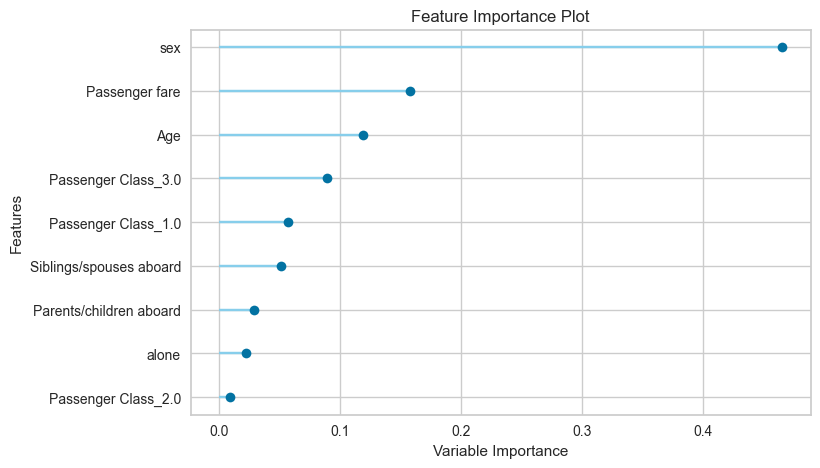

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8220,0.8654,0.6640,0.8363,0.7402,0.6076,0.6169


In [18]:
from pycaret.classification import *

# Define which columns are categorical, numeric, and other types
categorical_columns = ['Passenger Class', 'sex']
numeric_columns = ['Age', 'Siblings/spouses aboard', 'Parents/children aboard', 'Passenger fare']

clf1 = setup(data=df, target='Survived', categorical_features=categorical_columns)
gbm = create_model('gbc')
tuned_gbm = tune_model(gbm)
plot_model(tuned_gbm, plot='feature')
evaluate_model(tuned_gbm)
predictions = predict_model(tuned_gbm, data=df)